# Partie 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#les arrays sont batis avec les dimensions suivantes:
#pluie, arroseur, watson, holmes
# et chaque dimension: faux,vrai

prob_pluie=np.array([0.8,0.2]).reshape(2,1,1,1)
print("Pr(Pluie)=\n{}\n".format(np.squeeze(prob_pluie)))

prob_arroseur=np.array([0.9,0.1]).reshape(1,2,1,1)
print("Pr(Arroseur)=\n{}\n".format(np.squeeze(prob_arroseur)))


watson=np.array([[0.8,0.2],[0,1]]).reshape(2,1,2,1)
print("Pr(Watson|Pluie)=\n{}\n".format(np.squeeze(watson)))

holmes=np.array([[1,0],[0.1,0.9],[0,1], [0,1]]).reshape(2,2,1,2)
print("Pr(Holmes|Pluie,arroseur)=\n{}\n".format(np.squeeze(holmes)))


Pr(Pluie)=
[0.8 0.2]

Pr(Arroseur)=
[0.9 0.1]

Pr(Watson|Pluie)=
[[0.8 0.2]
 [0.  1. ]]

Pr(Holmes|Pluie,arroseur)=
[[[1.  0. ]
  [0.1 0.9]]

 [[0.  1. ]
  [0.  1. ]]]



In [75]:
#                                               P A W H
#print((prob_pluie*watson*holmes* prob_arroseur)[:,:,1,:].sum())#pr(W = 1)
#print((prob_pluie*watson*holmes* prob_arroseur)[:,:,1,1].sum())#pr(W = 1, H=1)
#print((prob_pluie*watson*holmes* prob_arroseur)[:,0,1,1].sum())#pr(W = 1, H=1, A=0)
#print((prob_pluie*watson*holmes* prob_arroseur)[:,0,1,:].sum())#pr(W = 1, A=0)
#print((prob_pluie*watson*holmes* prob_arroseur)[1,:,1,:].sum())#pr(W = 1, P=1)
#print((prob_pluie*watson*holmes* prob_arroseur)[:,:,:,1].sum())#pr(H=1)
#print((prob_pluie*watson*holmes* prob_arroseur)[:,0,:,1].sum())#pr(H = 1, A=0)
#print((prob_pluie*watson*holmes* prob_arroseur)[:,0,:,:].sum())#pr(A = 0)
#print((prob_pluie*watson*holmes* prob_arroseur)[1,:,:,:].sum())#pr(P = 1)



#pr(W = 1)
print((prob_pluie*watson*holmes* prob_arroseur)[:,:,1,:].sum())

#pr(W = 1|H = 1) = pr(W = 1, H=1)/pr(H=1)
print((prob_pluie*watson*holmes* prob_arroseur)[:,:,1,1].sum()/(prob_pluie*watson*holmes* prob_arroseur)[:,:,:,1].sum())

#pr(W = 1|A = 0,H = 1) = pr(W = 1, A=0,H = 1)/pr(A=0, H = 1)
print((prob_pluie*watson*holmes* prob_arroseur)[:,0,1,1].sum()/(prob_pluie*watson*holmes* prob_arroseur)[:,0,:,1].sum())

#pr(W = 1|A = 0) = pr(W = 1, A=0)/pr(A=0)
print((prob_pluie*watson*holmes* prob_arroseur)[:,0,1,:].sum()/(prob_pluie*watson*holmes* prob_arroseur)[:,0,:,:].sum())

#pr(W = 1|P = 1) = pr(W = 1, P=1)/pr(p=1)
print((prob_pluie*watson*holmes* prob_arroseur)[1,:,1,:].sum()/(prob_pluie*watson*holmes* prob_arroseur)[1,:,:,:].sum())

0.3600000000000001
0.7882352941176471
1.0
0.36
1.0


# Partie II

visualisation du jeu de données

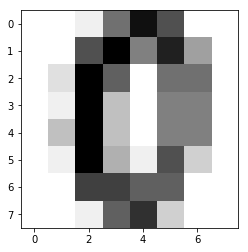

0


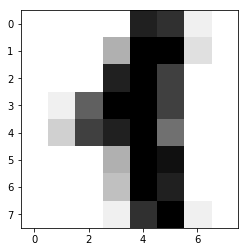

1


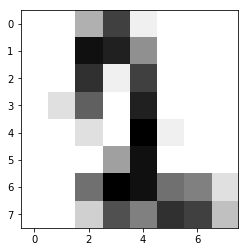

2


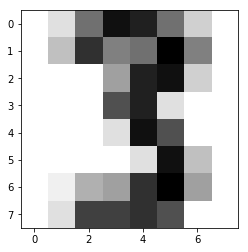

3


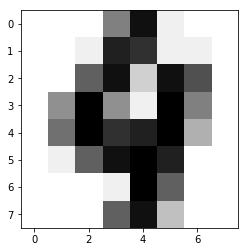

4


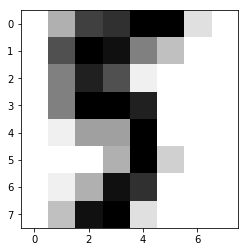

5


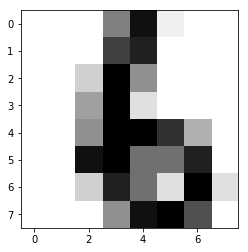

6


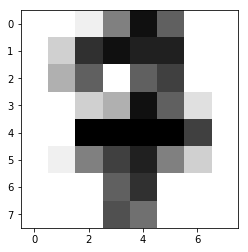

7


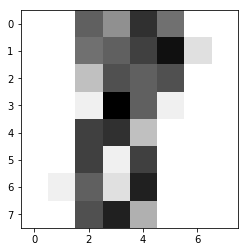

8


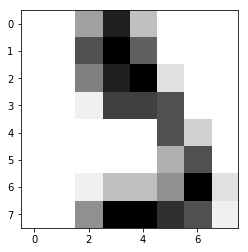

9


In [76]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits=datasets.load_digits()
y = digits.target
X = digits.data



Xim=[]
for i in range(10,20):
    Xim=X[i].reshape(8,8)*-1
    plt.imshow(Xim, cmap = plt.get_cmap('gray'))
    plt.show()
    print(y[i])

On doit effectuer de la classification d'image represantant chacun un chiffre. On a donc 10 classes possible ( de 0 a 9 )
on va effectuer une descente de gradient stockastique mini bathes pour par la suite faire une regression logostique

accuracy 0.8926146465144339
lr 0.001
minibatch_size 89


<Figure size 360x1656 with 0 Axes>

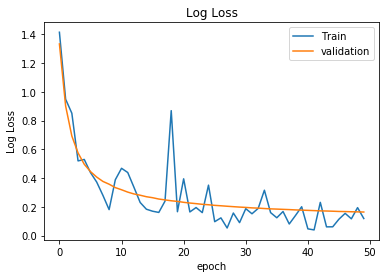

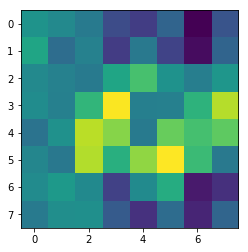

In [5]:
# le but est de faire le code le plus compact et simple a comprendre 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import statsmodels.api as sm
from sklearn.preprocessing import *

digits=datasets.load_digits()
X = digits.data
X = sm.add_constant(X) # on ajoute une ligne de constante dans les features
y=digits.target

y_one_hot=np.zeros((y.shape[0],len(np.unique(y))))
y_one_hot[np.arange(y.shape[0]),y]=1 #one hot target or shape NxK

X_train,X_test,y_train,y_test=train_test_split(X,y_one_hot,test_size=0.3,random_state=42)
X_test,X_validation,y_test,y_validation=train_test_split(X_test,y_test,test_size=0.5,
random_state=42)
W=np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1]))#weights of shape KxL
theta = W #theta = [W,b]  # on travail avec theta directement et non B, W

best_theta = None
best_accuracy = 0
lr = 0.001
nb_epochs=50
minibatch_size = len(y)//20

losses_train=[]
losses_validation=[]
accuracies=[]

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x),axis=0)

def get_accuracy(y,y_pred):
    return np.vdot(y, y_pred)/y.shape[0]# pourcentage des numero bien identifié

def get_grads(y,y_pred,x):
    return 2/minibatch_size*(np.dot(y_pred.T,x)-np.dot(y.T,x))
    
def get_loss(y, y_pred):
    #cost function
    res = 0
    for i in range(y_pred.shape[0]):
        for j in range(y_pred.shape[1]):
            if y[i,j]==1:
                res = res + np.log(y_pred[i,j])
    res = (-1)*res/(len(y))
    return res

for epoch in range(nb_epochs):
    loss=0
    accuracy=0
    # melanger les batchs
    X_train,  y_train = shuffle(X_train,y_train) # colonne avec des 1 dans xb de X_train
    for i in range(0,X_train.shape[0],minibatch_size):
        xi = X_train[i:i+minibatch_size]
        yi = y_train[i:i+minibatch_size]
        y_pred = softmax(np.dot(theta,xi.T)).T
        #print (yi[1],y_pred[1])
        gradient =get_grads(yi,y_pred,xi)
        # on peut faire varier lr par la suite
        loss = get_loss(yi,y_pred)
        theta = theta - lr*gradient
        accuracy=get_accuracy(yi,y_pred)
    losses_train.append(loss)#compute the loss on the train set
    # on fait la validation
    y_pred = softmax(np.dot(theta,X_validation.T)).T
    accuracy = get_accuracy(y_validation,y_pred)
    accuracies.append(accuracy)#compute the accuracy on the validation set
    losses_validation.append(get_loss(y_validation,y_pred))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_theta = theta
    elif accuracy < best_accuracy: #contre l'over fitting
        break

y_pred = softmax(np.dot(best_theta,X_test.T)).T
accuracy_on_unseen_data = get_accuracy(y_test,y_pred)
print('accuracy',accuracy_on_unseen_data) #0.897506925208
print('lr',lr)
print('minibatch_size',minibatch_size)
plt.figure(1,figsize=[5,23])

# plot log loss
fig, ax = plt.subplots()
ax.plot(losses_train, label='Train')
ax.plot(losses_validation, label='validation')
ax.legend()
plt.xlabel('epoch')
plt.ylabel('Log Loss')
plt.title('Log Loss')
plt.show()

best_theta = np.delete(best_theta, np.s_[-1:], axis=1) # on récupere la matrice W
plt.imshow(best_theta[4,:].reshape(8,8))



In [78]:
x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(3.0)
print(x1)
print(x2)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[0. 1. 2.]


vérification des prédictions avec les images

(270, 10)


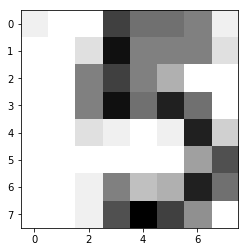

5
5


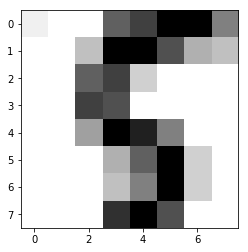

5
5


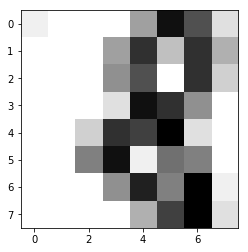

8
8


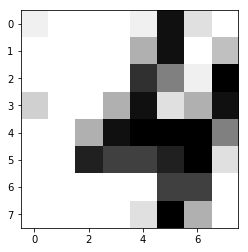

4
4


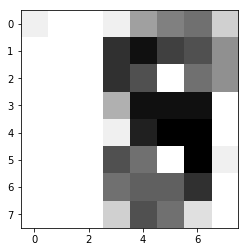

8
8


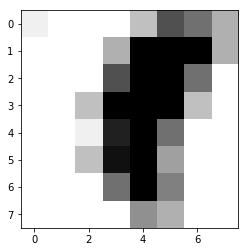

1
1


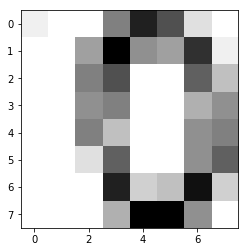

0
0


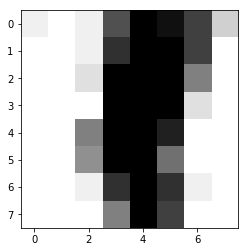

1
8


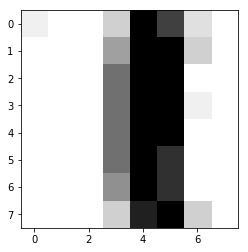

1
1


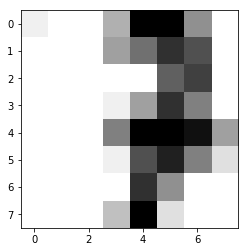

7
7


In [79]:
print(y_pred.shape)
X_test = np.delete(X_test, np.s_[-1:], axis=1)
Xim=[]
for i in range(40,50):
    Xim=X_test[i].reshape(8,8)*-1
    plt.imshow(Xim, cmap = plt.get_cmap('gray'))
    plt.show()
    print(np.argmax(y_test[i],axis=0))
    print(np.argmax(y_pred[i],axis=0))

frequences d'apparition des digits

## Matrice de confusion

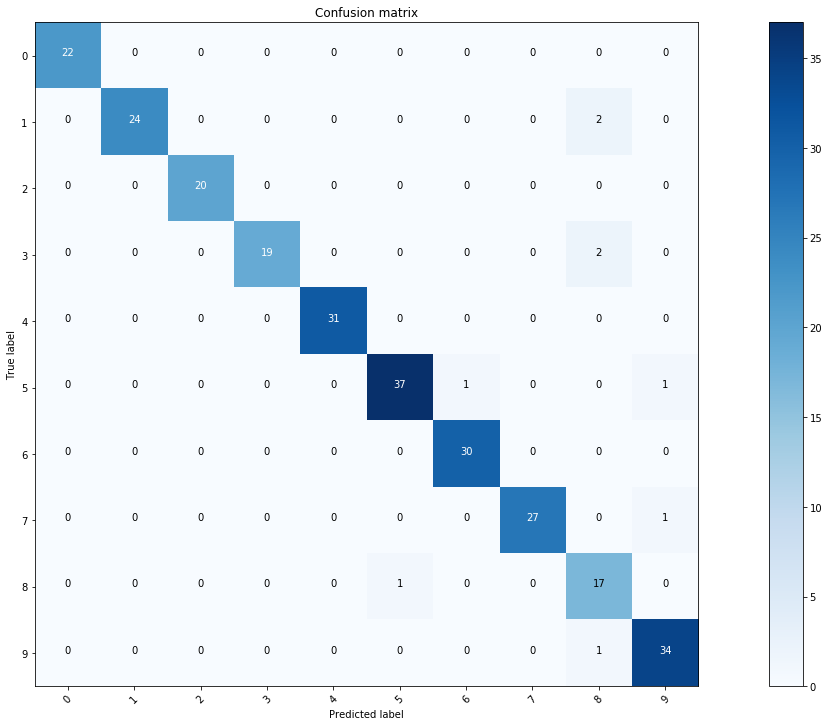

In [6]:
# source SKlearn 
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py


import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(y_pred,axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plt.figure(figsize=(20,10))
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

# on fait varier les la tailles des mini-batchs et le learning rate

In [81]:
# on remet le code dans une fonction
def SGDM(lr,minibatch_size):
    digits=datasets.load_digits()
    X = digits.data
    X = sm.add_constant(X) # on ajoute une ligne de constante dans les features
    y=digits.target

    y_one_hot=np.zeros((y.shape[0],len(np.unique(y))))
    y_one_hot[np.arange(y.shape[0]),y]=1 #one hot target or shape NxK

    X_train,X_test,y_train,y_test=train_test_split(X,y_one_hot,test_size=0.3,random_state=42)
    X_test,X_validation,y_test,y_validation=train_test_split(X_test,y_test,test_size=0.5,
    random_state=42)
    W=np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1]))#weights of shape KxL
    theta = W #theta = [W,b]  # on travail avec theta directement et non B, W

    best_theta = None
    best_accuracy = 0
    nb_epochs=50

    losses_train=[]
    losses_validation=[]
    accuracies=[]

    def softmax(x):
        return np.exp(x) / np.sum(np.exp(x),axis=0)

    def get_accuracy(y,y_pred):
        return np.vdot(y, y_pred)/y.shape[0]# pourcentage des numero bien identifié

    def get_grads(y,y_pred,x):
        return 2/minibatch_size*(np.dot(y_pred.T,x)-np.dot(y.T,x))

    def get_loss(y, y_pred):
        #cost function
        res = 0
        for i in range(y_pred.shape[0]):
            for j in range(y_pred.shape[1]):
                if y[i,j]==1:
                    res = res + np.log(y_pred[i,j])
        res = (-1)*res/(len(y))
        return res

    for epoch in range(nb_epochs):
        loss=0
        accuracy=0
        # melanger les batchs
        X_train,  y_train = shuffle(X_train,y_train) # colonne avec des 1 dans xb de X_train
        for i in range(0,X_train.shape[0],minibatch_size):
            xi = X_train[i:i+minibatch_size]
            yi = y_train[i:i+minibatch_size]
            y_pred = softmax(np.dot(theta,xi.T)).T
            #print (yi[1],y_pred[1])
            gradient =get_grads(yi,y_pred,xi)
            # on peut faire varier lr par la suite
            loss = get_loss(yi,y_pred)
            theta = theta - lr*gradient
            accuracy=get_accuracy(yi,y_pred)
        losses_train.append(loss)#compute the loss on the train set
        # on fait la validation
        y_pred = softmax(np.dot(theta,X_validation.T)).T
        accuracy = get_accuracy(y_validation,y_pred)
        accuracies.append(accuracy)#compute the accuracy on the validation set
        losses_validation.append(get_loss(y_validation,y_pred))
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_theta = theta

    y_pred = softmax(np.dot(theta,X_test.T)).T
    accuracy_on_unseen_data = get_accuracy(y_test,y_pred)
    print('accuracy',accuracy_on_unseen_data) #0.897506925208
    print('lr',lr)
    print('minibatch_size',minibatch_size)
    plt.figure(1,figsize=[10,8])
    
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(losses_train, label='Train')
    ax.plot(losses_validation, label='validation')
    ax.legend()
    plt.xlabel('epoch')
    plt.ylabel('Log Loss')
    plt.title('learning rate %s minibatch_size %s'%(lr,minibatch_size))
    plt.show()

C:\Users\edoua\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\Users\edoua\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


accuracy nan
lr 0.1
minibatch_size 1


<Figure size 720x576 with 0 Axes>

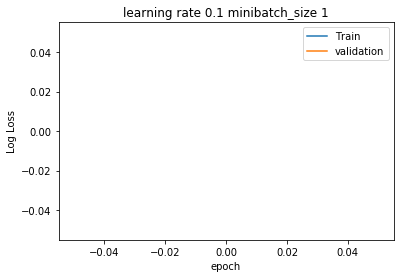

accuracy 0.9621701643509812
lr 0.1
minibatch_size 20


<Figure size 720x576 with 0 Axes>

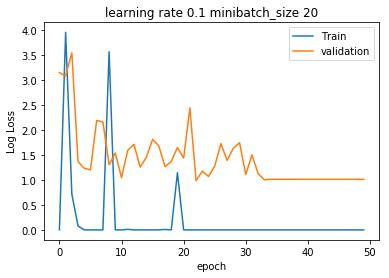

accuracy 0.9560985000088077
lr 0.1
minibatch_size 200


<Figure size 720x576 with 0 Axes>

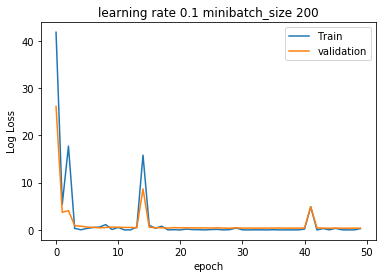

accuracy 0.9615780766301593
lr 0.1
minibatch_size 1000


<Figure size 720x576 with 0 Axes>

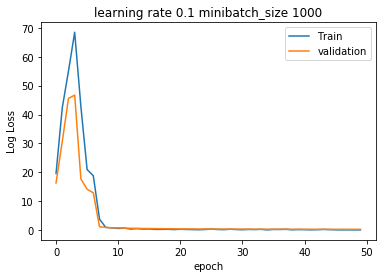

accuracy 0.957635353098697
lr 0.01
minibatch_size 1


<Figure size 720x576 with 0 Axes>

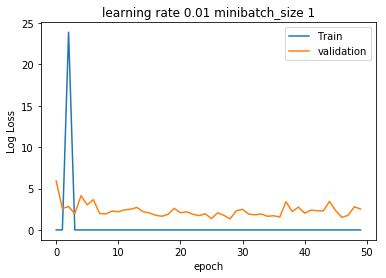

accuracy 0.9505548224823808
lr 0.01
minibatch_size 20


<Figure size 720x576 with 0 Axes>

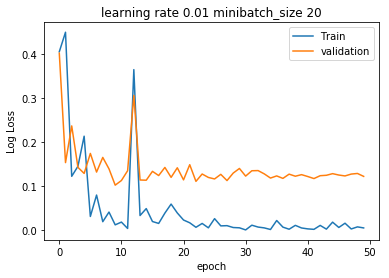

accuracy 0.9384404039447239
lr 0.01
minibatch_size 200


<Figure size 720x576 with 0 Axes>

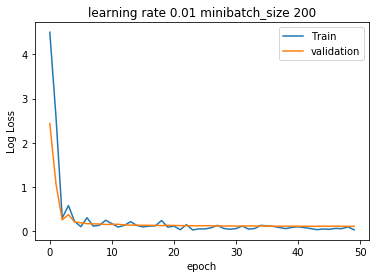

accuracy 0.8840207563604818
lr 0.01
minibatch_size 1000


<Figure size 720x576 with 0 Axes>

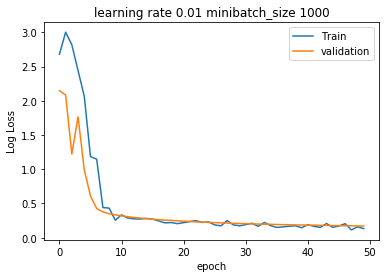

accuracy 0.9596729130024618
lr 0.001
minibatch_size 1


<Figure size 720x576 with 0 Axes>

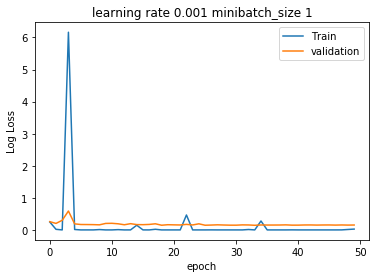

accuracy 0.9359076029986385
lr 0.001
minibatch_size 20


<Figure size 720x576 with 0 Axes>

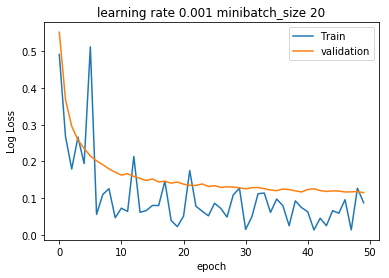

accuracy 0.8423917637171878
lr 0.001
minibatch_size 200


<Figure size 720x576 with 0 Axes>

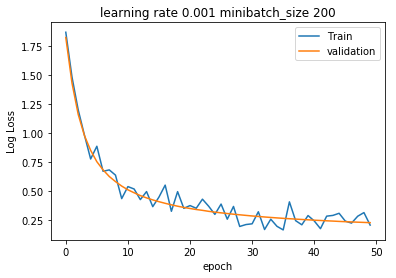

accuracy 0.6268878538078904
lr 0.001
minibatch_size 1000


<Figure size 720x576 with 0 Axes>

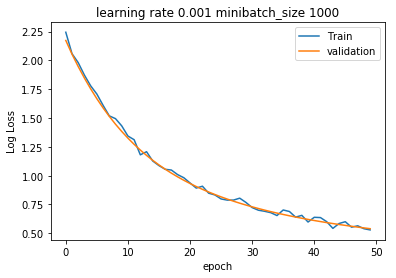

In [82]:
lr=[0.1,0.01,0.001]
minibatch_size = [1,20,200,1000]
for i in lr:
    for j in minibatch_size:
        SGDM(i,j)

# ajout de dimensions & Elastic net

accuracy 0.10079307835088798
lr 0.001
minibatch_size 89
avec alpha 0.99 et beta 0.0


<Figure size 720x576 with 0 Axes>

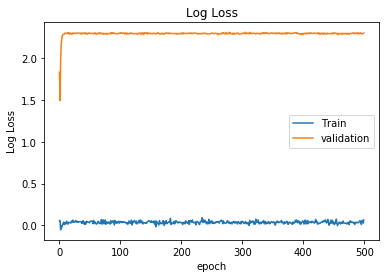

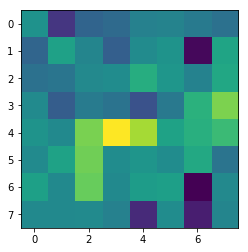

In [83]:
digits=datasets.load_digits()
X = digits.data
X = sm.add_constant(X) # on ajoute une ligne de constante dans les features
y=digits.target

y_one_hot=np.zeros((y.shape[0],len(np.unique(y))))
y_one_hot[np.arange(y.shape[0]),y]=1 #one hot target or shape NxK

#important pour utiliser elastic net
scaler = StandardScaler()
scaler.fit(X)

X_train,X_test,y_train,y_test=train_test_split(X,y_one_hot,test_size=0.3,random_state=42)
X_test,X_validation,y_test,y_validation=train_test_split(X_test,y_test,test_size=0.5,
random_state=42)
W=np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1]))#weights of shape KxL
theta = W #theta = [W,b]  # on travail avec theta directement et non B, W


# ajout des 8 dimensions
# dans le random je prend que des nombre entier et pas des nombre a virgules
X_train = np.vstack([X_train, np.random.randint(X.max()+1, size=(8,65))])# car la plus petit valeur de X est 0 et la plus grand 16
X_test = np.vstack([X_test, np.random.randint(X.max()+1, size=(8,65))])
X_validation = np.vstack([X_validation, np.random.randint(X.max()+1, size=(8,65))])

y_validation = np.vstack([y_validation, np.eye(10)[np.random.choice(10, 8)]])
y_test = np.vstack([y_test, np.eye(10)[np.random.choice(10, 8)]])
y_train = np.vstack([y_train, np.eye(10)[np.random.choice(10, 8)]])
# fin ajout dimensions



best_theta = None
best_accuracy = 0
lr = 0.001
nb_epochs=500
minibatch_size = len(y)//20
alpha=0.1
beta=0.5
Lalpha=[]
Letab=[]
losses_train=[]
losses_validation=[]
accuracies=[]

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x),axis=0)

def get_accuracy(y,y_pred):
    return np.vdot(y, y_pred)/y.shape[0]# pourcentage des numero bien identifié

def get_grads(y,y_pred,x):
    return 1/minibatch_size*(np.dot(y_pred.T,x)-np.dot(y.T,x))
    
def get_loss(y, y_pred):
    #cost function
    res = 0
    for i in range(y_pred.shape[0]):
        for j in range(y_pred.shape[1]):
            if y[i,j]==1:
                res = res + np.log(y_pred[i,j])
    res = (-1)*res/(len(y))
    return res

def param(alpha,beta,theta,losses_validation):
    opt=losses_validation
    for i in range(100):
        i=i/100
        for j in range(100):
            j=j/100
            res = losses_validation+i*np.sum(theta)+j*np.sum(theta[1:]**2)
            if res<opt:
                opt = res
                alpha=i
                beta=j
    return (alpha,beta)

for epoch in range(nb_epochs):
    loss=0
    accuracy=0
    # melanger les batchs
    X_train,  y_train = shuffle(X_train,y_train) # colonne avec des 1 dans xb de X_train
    for i in range(0,X_train.shape[0],minibatch_size):
        xi = X_train[i:i+minibatch_size]
        yi = y_train[i:i+minibatch_size]
        y_pred = softmax(np.dot(theta,xi.T)).T
        #print (yi[1],y_pred[1])
        gradient =get_grads(yi,y_pred,xi)
        # on peut faire varier lr par la suite
        loss = get_loss(y_train, y_pred)+alpha*np.sum(theta)+beta*np.sum(theta[1:]**2)
        theta =theta-lr*(gradient+alpha*np.sign(theta)+2*beta*np.sum(theta[1:]))
        accuracy=get_accuracy(yi,y_pred)
    losses_train.append(loss)#compute the loss on the train set
    # on fait la validation
    y_pred = softmax(np.dot(theta,X_validation.T)).T
    accuracy = get_accuracy(y_validation,y_pred)
    accuracies.append(accuracy)#compute the accuracy on the validation set
    losses_validation.append(get_loss(y_validation,y_pred))
    (alpha,beta) = param(alpha,beta,theta,losses_validation[-1])
    Lalpha.append(alpha)
    Letab.append(beta)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_theta = theta
        
    #elif accuracy < best_accuracy: #contre l'over fitting
    #    break
    

y_pred = softmax(np.dot(theta,X_test.T)).T
accuracy_on_unseen_data = get_accuracy(y_test,y_pred)
print('accuracy',accuracy_on_unseen_data) #0.897506925208
print('lr',lr)
print('minibatch_size',minibatch_size)
print('avec alpha %s et beta %s'%(alpha,beta))
plt.figure(1,figsize=[10,8])

# plot log loss
fig, ax = plt.subplots()
ax.plot(losses_train, label='Train')
ax.plot(losses_validation, label='validation')
ax.legend()
plt.xlabel('epoch')
plt.ylabel('Log Loss')
plt.title('Log Loss')
plt.show()

best_theta = np.delete(best_theta, np.s_[-1:], axis=1) # on récupere la matrice W
plt.imshow(best_theta[4,:].reshape(8,8))
